Repo card metadata block was not found. Setting CardData to empty.


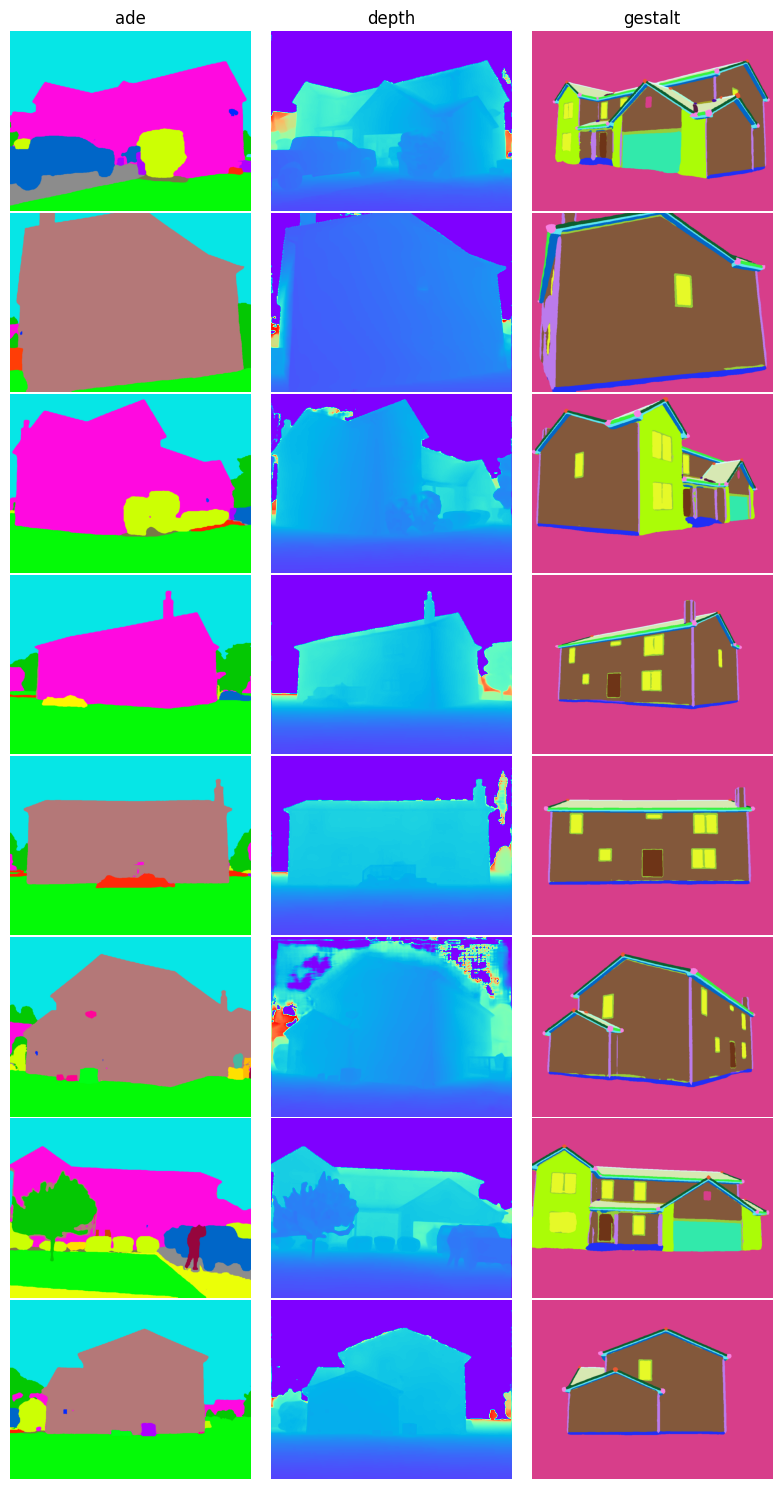

In [1]:
from datasets import load_dataset
from hoho2025.vis import plot_all_modalities
from hoho2025.viz3d import *

def read_colmap_rec(colmap_data):
    import pycolmap
    import tempfile,zipfile
    import io
    with tempfile.TemporaryDirectory() as tmpdir:
        with zipfile.ZipFile(io.BytesIO(colmap_data), "r") as zf:
            zf.extractall(tmpdir)  # unpacks cameras.txt, images.txt, etc. to tmpdir
        # Now parse with pycolmap
        rec = pycolmap.Reconstruction(tmpdir)
        return rec

ds = load_dataset("usm3d/hoho25k", streaming=True, trust_remote_code=True)
for a in ds['train']:
    break

fig, ax = plot_all_modalities(a)

In [2]:
fig3d = init_figure()
plot_reconstruction(fig3d, read_colmap_rec(a['colmap_binary']))
plot_wireframe(fig3d, a['wf_vertices'], a['wf_edges'], a['wf_classifications'])
plot_bpo_cameras_from_entry(fig3d, a)
fig3d

FigureWidget({
    'data': [{'marker': {'color': array([[  0,   0,   0],
                                         [ 54,  60,  22],
                                         [128, 113,  38],
                                         ...,
                                         [110, 106, 111],
                                         [109, 100,  86],
                                         [ 38,  36,  21]], shape=(15842, 3), dtype=uint8),
                         'line': {'width': 0.0},
                         'size': 1},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter3d',
              'uid': '02573416-b74d-4254-991e-2827fdfa8fe7',
              'x': array([-14.21453574, -14.06456618, -14.14744164, ...,   4.31590479,
                          -13.64578435,  -6.06684076], shape=(15842,)),
              'y': array([-2.16232685, -2.03566307, -2.19866563, ..., -2.65241915, -0.90806038,
                           0.22967217], shape=(15842,

In [6]:
from hoho2025.example_solutions import predict_wireframe
pred_vertices, pred_connections = predict_wireframe(a)

fig3d = init_figure()
plot_reconstruction(fig3d, read_colmap_rec(a['colmap_binary']))
plot_wireframe(fig3d, a['wf_vertices'], a['wf_edges'], a['wf_classifications'])
plot_wireframe(fig3d, pred_vertices, pred_connections, color='rgb(0, 255, 255)')
fig3d

Fitted depth scale k=0.8441 for image 38216cf4bfe
Not enough vertices or connections found in image 1, skipping.
Fitted depth scale k=0.9289 for image 4b83683eb33
Fitted depth scale k=0.9979 for image 84639dd680b
Fitted depth scale k=0.9568 for image 9adbe4a614a
Fitted depth scale k=0.9782 for image b085cda37b8
Fitted depth scale k=0.8546 for image d9c047b9532
Fitted depth scale k=0.9843 for image ec05569fe84


FigureWidget({
    'data': [{'marker': {'color': array([[  0,   0,   0],
                                         [ 54,  60,  22],
                                         [128, 113,  38],
                                         ...,
                                         [110, 106, 111],
                                         [109, 100,  86],
                                         [ 38,  36,  21]], shape=(15842, 3), dtype=uint8),
                         'line': {'width': 0.0},
                         'size': 1},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter3d',
              'uid': '681d4520-5e19-4b87-b466-c09ee201878c',
              'x': array([-14.21453574, -14.06456618, -14.14744164, ...,   4.31590479,
                          -13.64578435,  -6.06684076], shape=(15842,)),
              'y': array([-2.16232685, -2.03566307, -2.19866563, ..., -2.65241915, -0.90806038,
                           0.22967217], shape=(15842,

In [4]:
from hoho2025.metric_helper import hss

score = hss(pred_vertices, pred_connections,
            a['wf_vertices'], a['wf_edges'],
            vert_thresh=0.5, edge_thresh=0.5)
print (score)

HSSReturnType(hss=np.float64(0.3589541140294077), f1=np.float64(0.4761904761904763), iou=np.float64(0.2880397707744644))
